<h2 align=center>Analyze Worldwide Box Office Data with Seaborn and Python (Part 1)</h2>
<img src="revenue.png">

### Libraries

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import json
import ast
from urllib.request import urlopen
from PIL import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaito\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Task 1: Data Loading and Exploration

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<AxesSubplot: >

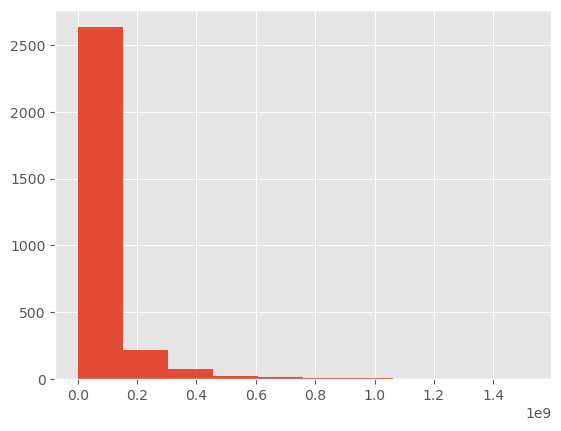

In [7]:
# test.head()
train.revenue.hist()

In [36]:
train['log_revenue'] = np.log1p(train['revenue'])
train['log_budget'] = np.log1p(train['budget'])
test['log_revenue'] = np.log1p(train['revenue'])
test['log_budget'] = np.log1p(train['budget'])
train.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors,log_revenue,log_budget
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,...,2,13,8,4,2,4,4,0,16.326300,16.454568
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,...,1,0,1,1,1,0,0,0,18.370959,17.504390
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,...,1,5,4,3,6,3,1,0,16.387512,15.009433
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,...,1,0,0,1,0,0,0,0,16.588099,13.997833
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2/5/09,...,1,0,0,1,0,0,0,0,15.182615,0.000000


### Task 2: Visualizing the Target Distribution

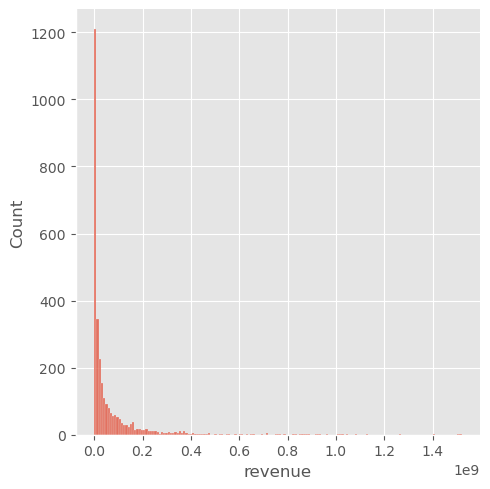

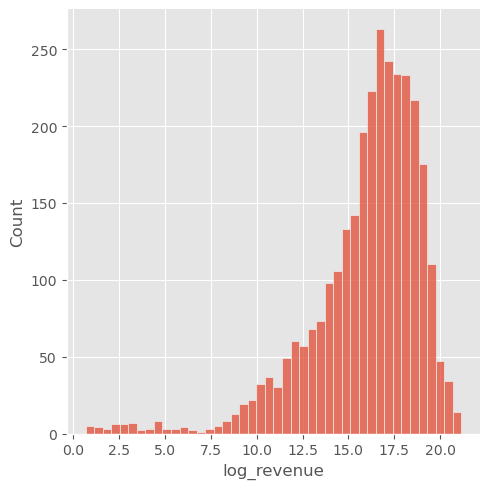

In [29]:

sns.displot(data=train,x='revenue')
sns.displot(data=train,x='log_revenue')

### Task 3: Relationship between Film Revenue and Budget

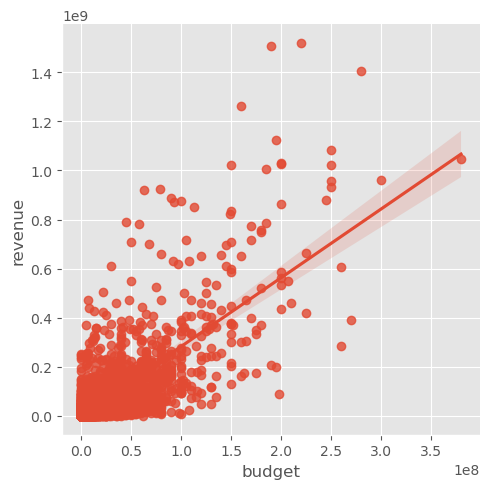

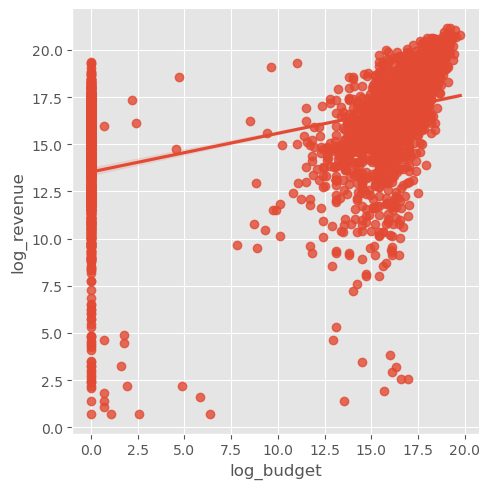

In [35]:
sns.lmplot(data=train,x='budget',y='revenue')
sns.lmplot(data=train,x='log_budget',y='log_revenue')

### Task 4: Does having an Official Homepage Affect Revenue?

In [46]:
train['homepage'].value_counts().head()
train['has_homepage'] = np.where(train['homepage'].isna(),0,1)
test['has_homepage'] = np.where(test['homepage'].isna(),0,1)
train[['homepage','has_homepage']].head()

,homepage,has_homepage
0,http://www.pokemon.com/us/movies/movie-pokemon...,1
1,NaN,0
2,NaN,0
3,http://www.sonyclassics.com/incendies/,1
4,NaN,0


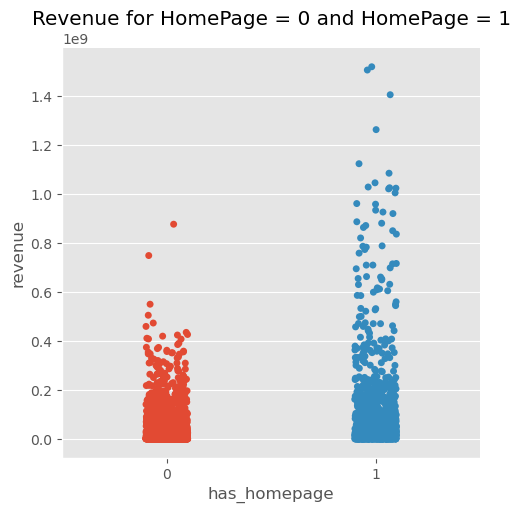

In [64]:
sns.catplot(data=train,x='has_homepage',y='revenue',hue='has_homepage')
plt.title('Revenue for HomePage = 0 and HomePage = 1');


### Task 5: Distribution of Languages in Film

In [94]:
lang = train['original_language'].value_counts()        # lang.index[:10] = top 10 lang
lang_data = train[train['original_language'].isin(lang.index[:10])]

Text(0.5, 1.0, 'Log Revenue by language')

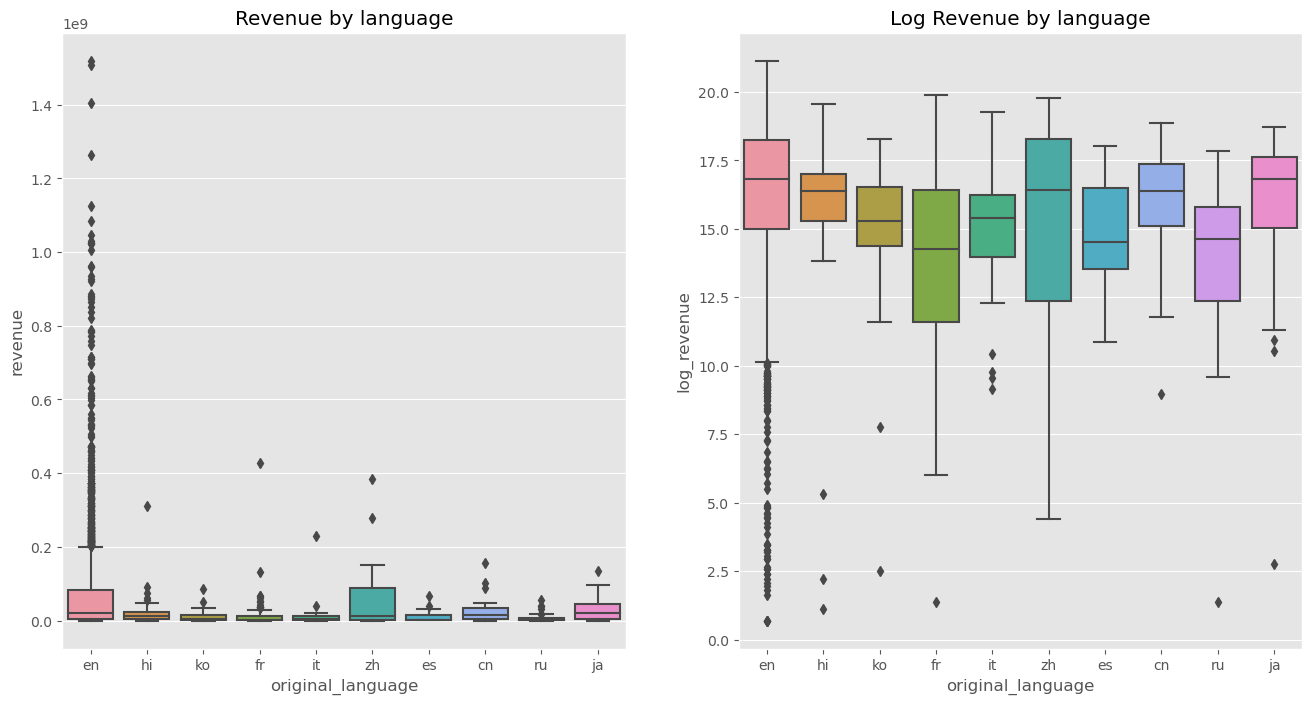

In [110]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(data=lang_data,y='revenue',x='original_language')
plt.title('Revenue by language')
plt.subplot(1,2,2)
sns.boxplot(data=lang_data,y='log_revenue',x='original_language')
plt.title('Log Revenue by language')

### Task 6: Frequent Words in Film Titles and Descriptions

Text(0.5, 1.0, 'top Words in movie titles')

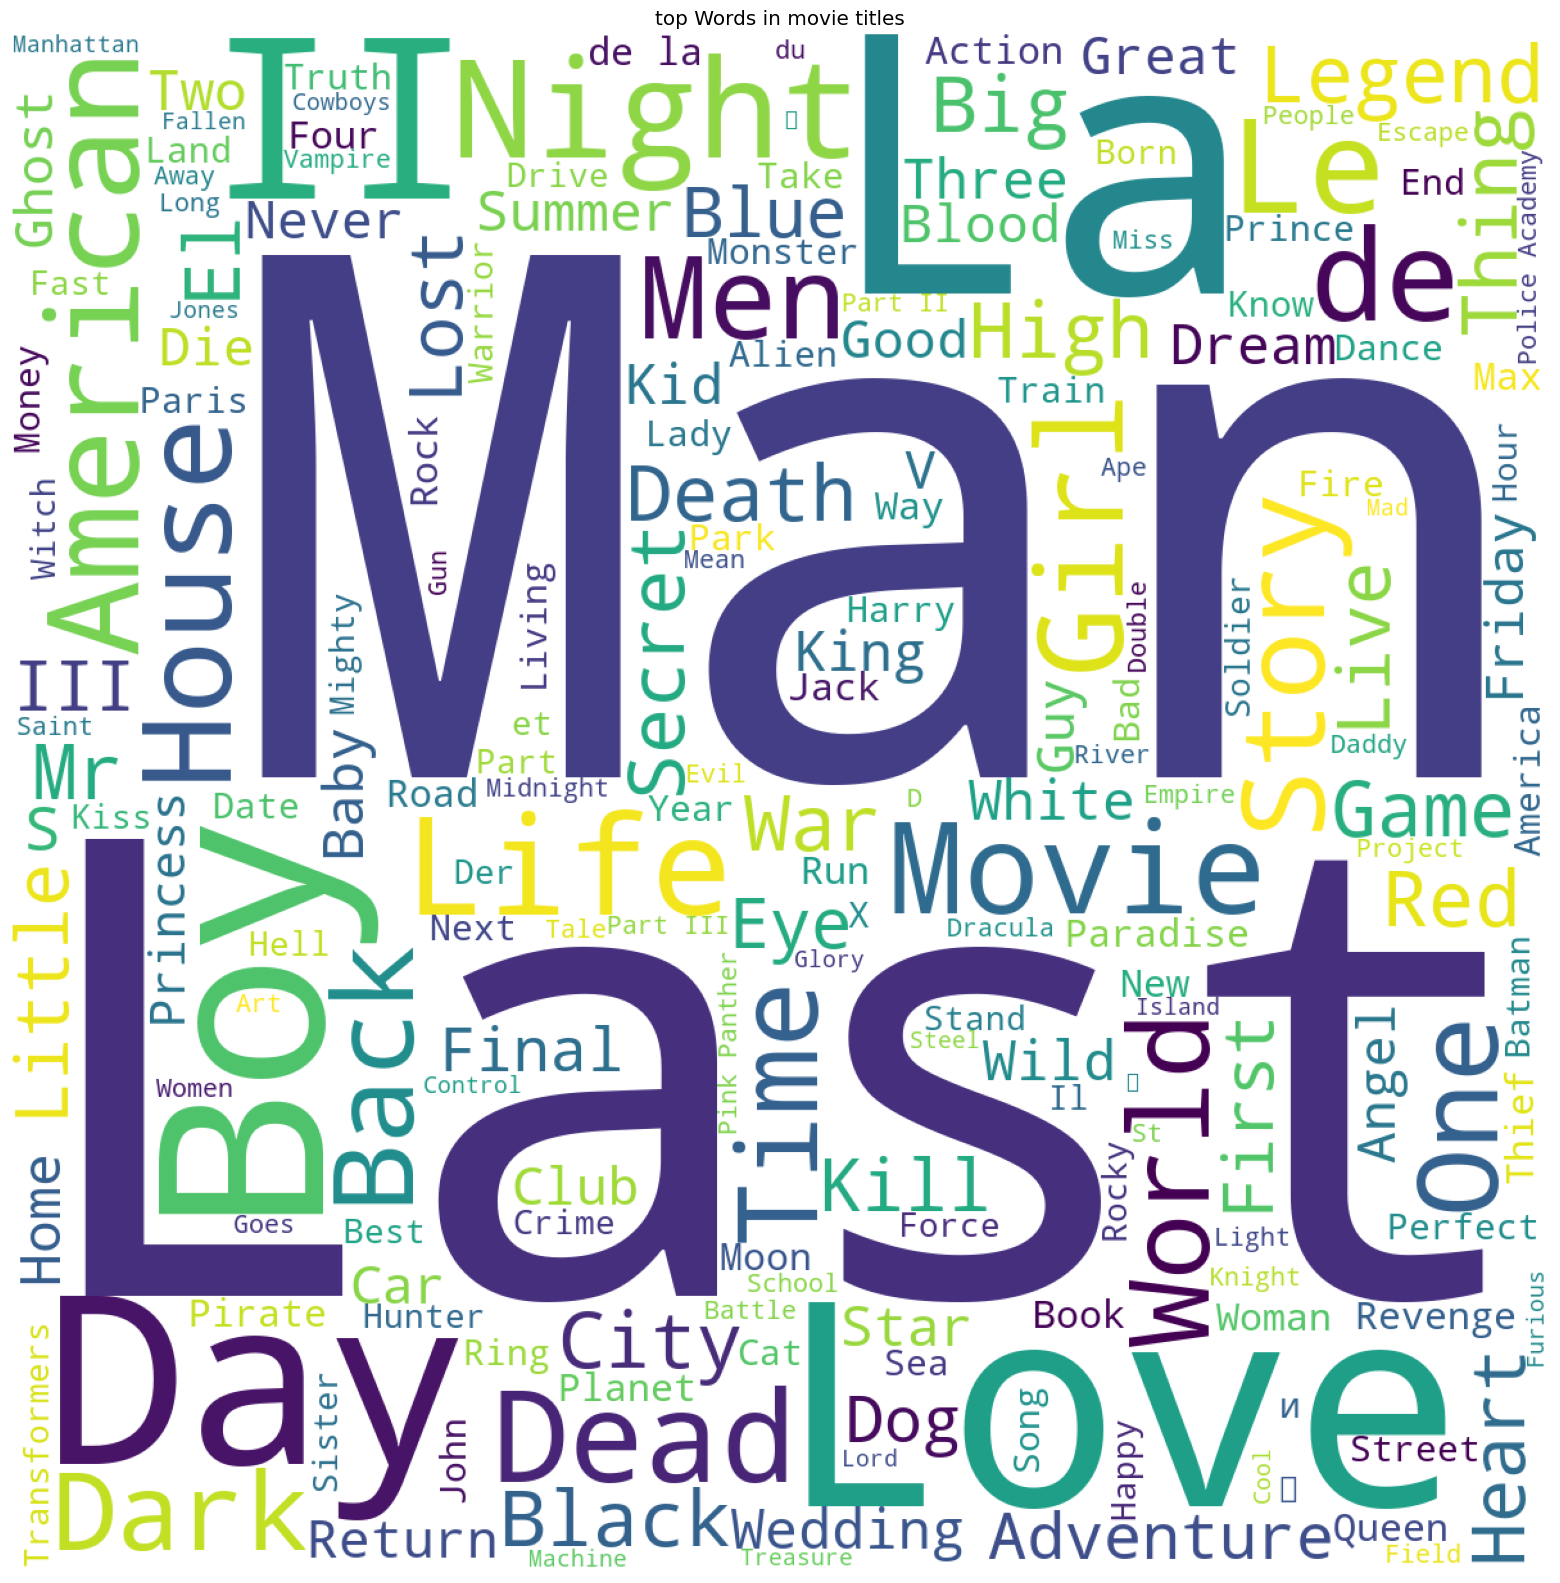

In [129]:
titles = ' '.join(train['original_title'].values)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(background_color='white',width=1200,height=1200).generate(titles))
plt.axis('off')
plt.title('top Words in movie titles')

Text(0.5, 1.0, 'top Words in movie overview')

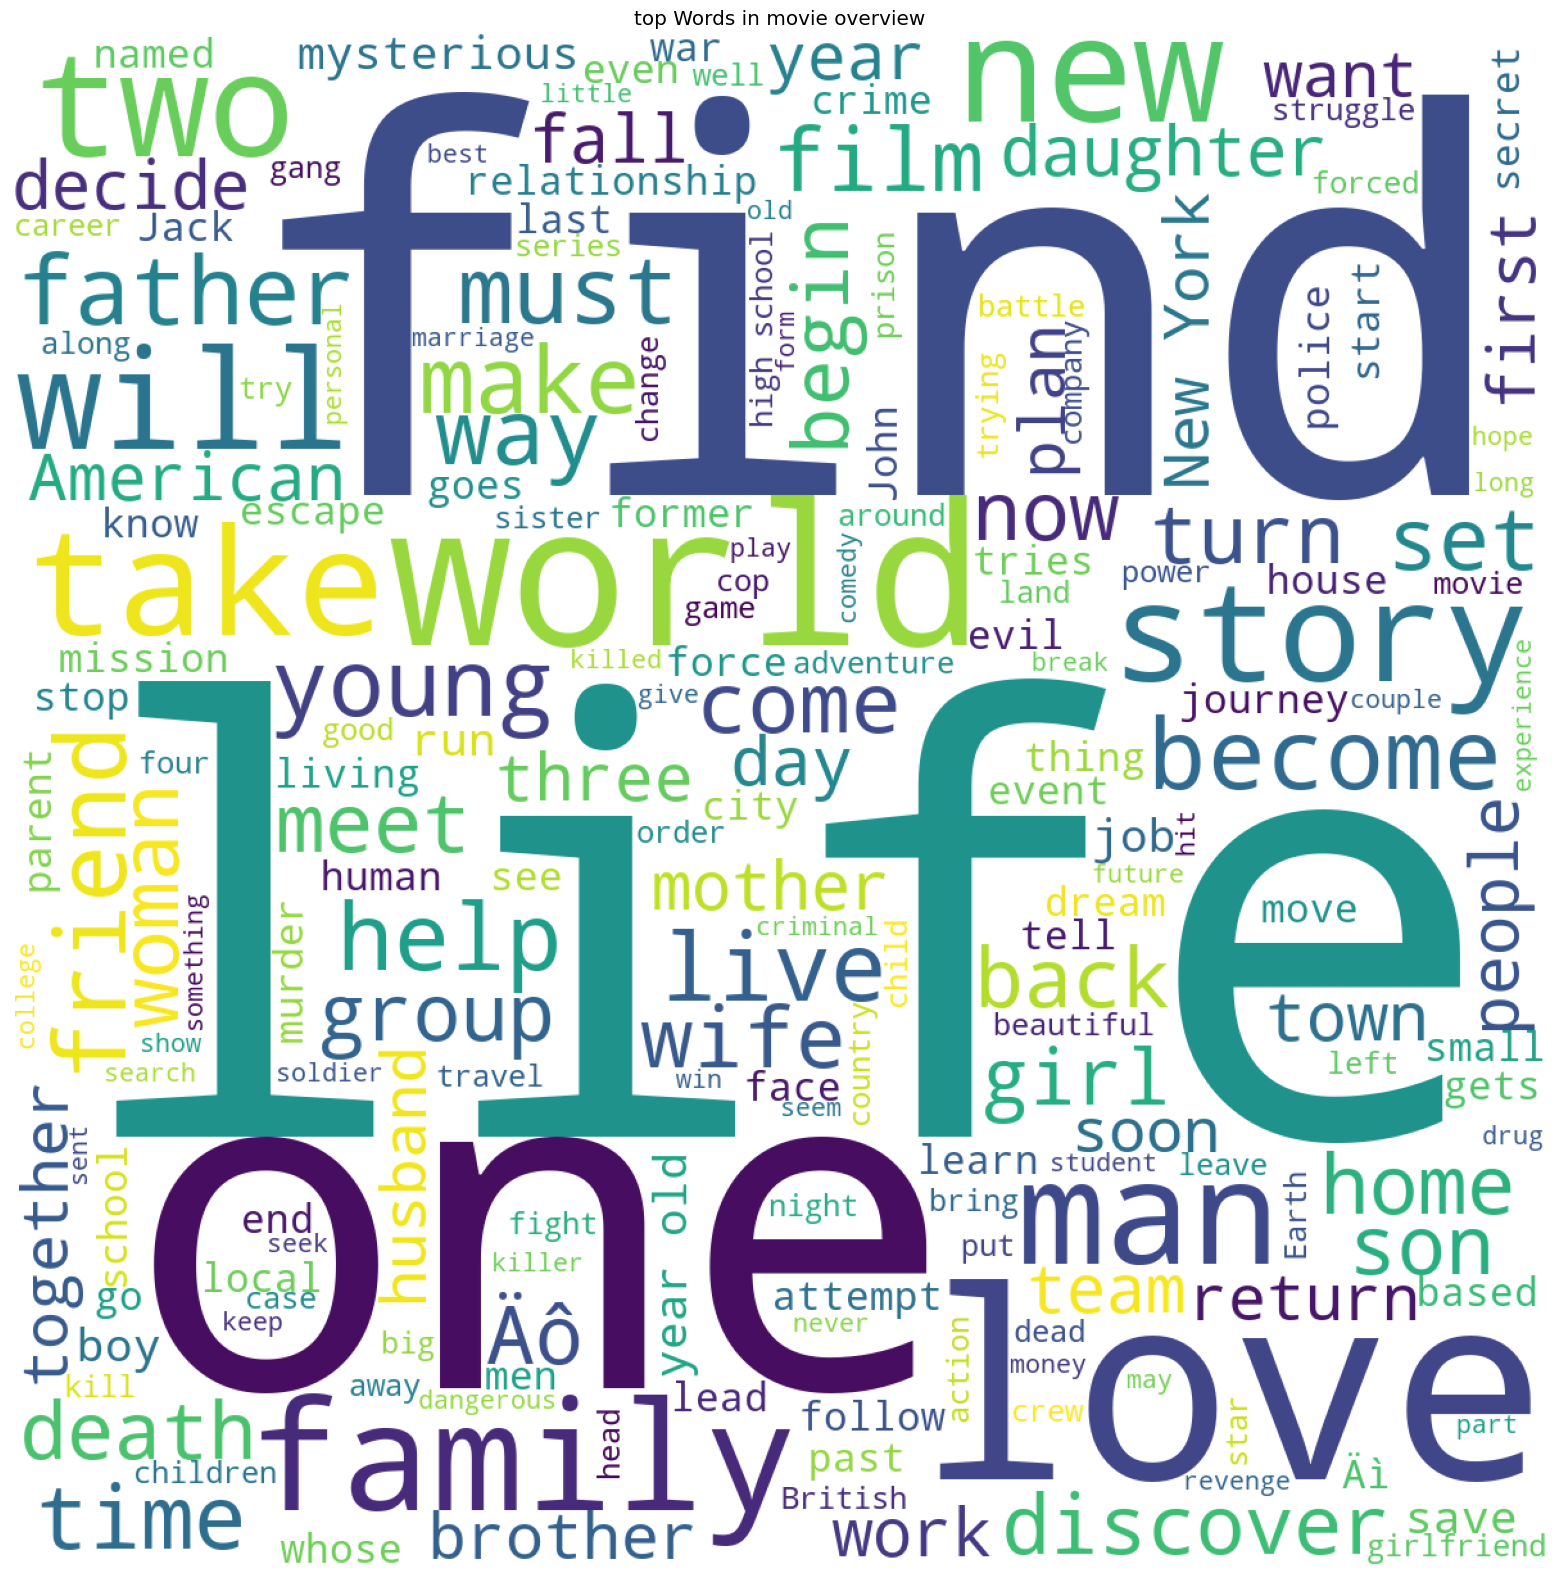

In [142]:
titles = ' '.join(train['overview'].fillna('').values)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(background_color='white',width=1200,height=1200).generate(titles))
plt.axis('off')
plt.title('top Words in movie overview')

### Task 7: Do Film Descriptions Impact Revenue?

In [144]:
import eli5
from sklearn.linear_model import LinearRegression

In [145]:
vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),
    min_df=5
)
overview_text = vectorizer.fit_transform(train['overview'].fillna(''))
linreg = LinearRegression()
linreg.fit(overview_text,train['log_revenue'])
eli5.show_weights(linreg,vec = vectorizer,top=20,feature_filter=lambda x : x!='<BIAS>')
